Supermart Grocery Sales-Data Analysis(EDA)

STEP 1: IMPORT REQUIRED LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.4 MB/s eta 0:01:03
   ---------------------------------------- 1.0/150.0 MB 2.4 MB/s eta 0:01:03
   ---------------------------------------- 1.6/150.0 MB 2.3 MB/s eta 0:01:04
    --------------------------------------- 2.1/150.0 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 2.6/150.0 MB 2.4 MB/s eta 0:01:01
    --------------------------------------- 3.1/150.0 MB 2.5 MB/s eta 0:00:59
   - -------------------------------------- 3.9/150.0 MB 2.8 MB/s eta 0:00:53
   - -------------------------------------- 4.7/150.0 MB 2.8 MB/s eta 0:00:52
   - -------------------------------------- 5.2/150.0 MB 2.7 MB/s eta 0:00:54
   - -------------------------------------- 5.8/150.0 MB 2.7 MB/s eta 0:00:54



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\akhil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


STEP 2 : LOAD THE DATASET

In [4]:
#Load the dataset
data = pd.read_csv(r"C:\Users\akhil\Documents\Data analysis\DA Assignment (Unified Mentor)\Projects\Project 2\Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [5]:
#Display the first few rows of the dataset

print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


STEP 3: DATA PREPROCESSING

1.Check for missing values and handle them

In [6]:
#Check for missing values

print(data.isnull().sum())


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [7]:
#Check for Duplicates

data.drop_duplicates(inplace=True)

2. Convert Date Columns to DateTime Format

In [8]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')


In [9]:
# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

3. Label Encoding for Categorical Variables

In [10]:
# Extract month from 'Order Date'
data['Month'] = data['Order Date'].dt.month

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode each column separately
for col in ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


In [12]:
# Display the first few rows after encoding
print(data.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  Month  
0   1254      0.12  401.28      0        8.0         11.0      2017.0     10  
1    749      0.18  149.80      0        8.0         11.0      2017.0     10  
2   2360      0.21  165.20      0       12.0          6.0      2017.0      5  
3    896      0.25   89.60      0       11.0         10.0      2016.0      9  
4   2355      0.26  918.45      0       11.0         10.0      2016.0      9  


Step 4: Exploratory Data Analysis (EDA)

1. Distribution of Sales by Category

C:\Users\akhil\AppData\Local\Temp\ipykernel_4004\771904437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


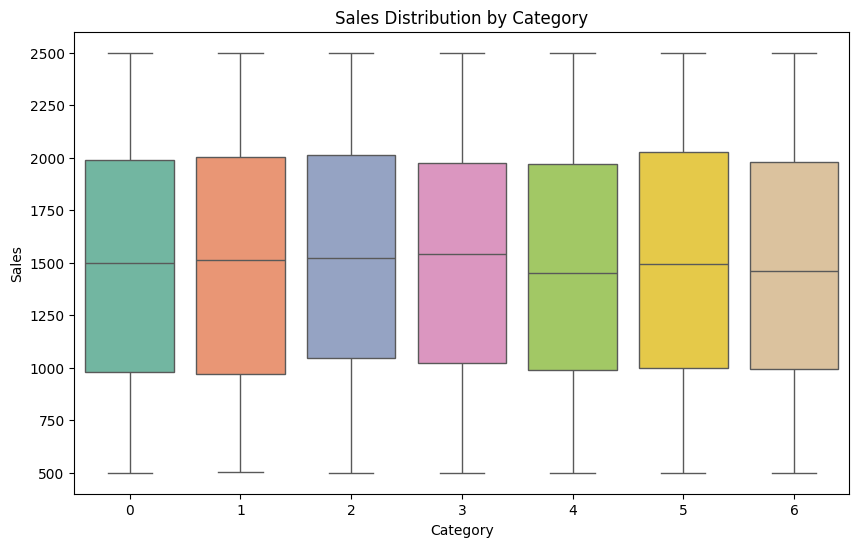

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

2. Sales Trends Over Time

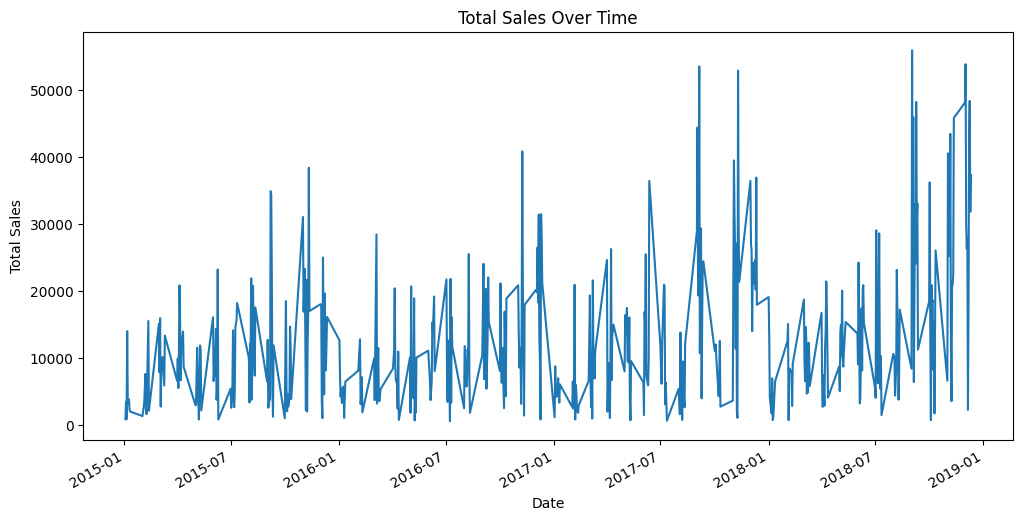

In [14]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

3. Correlation Heatmap

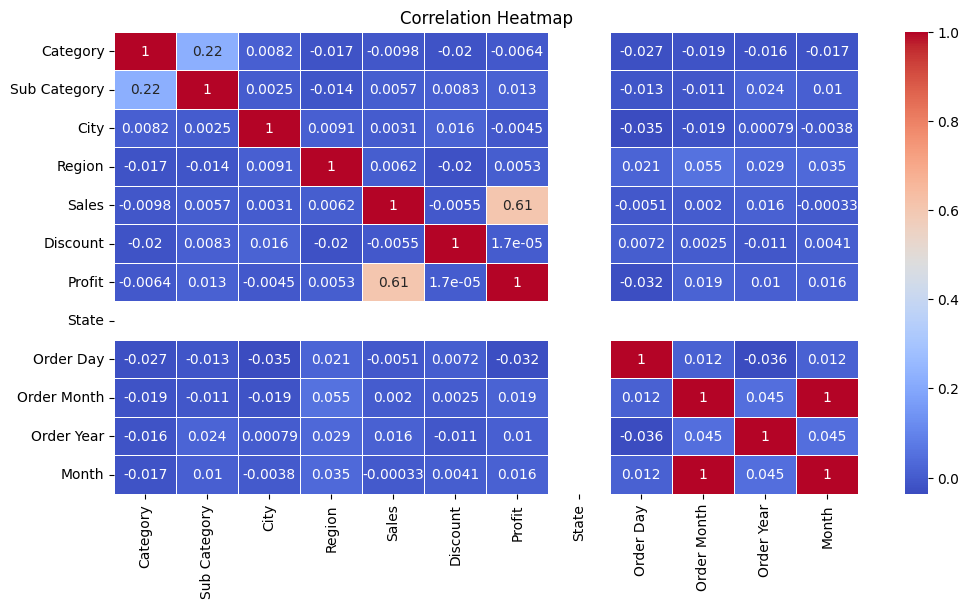

In [15]:
# Compute correlation only on numeric columns
corr_matrix = data.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Step 5: Feature Selection and Model Building

We’ll use features like Category, Sub Category, City, Region, State,
month_no, Discount, and Profit to predict Sales.

In [17]:
# Select features and target variable
target = data['Sales']
features = data.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales', 'Month'])


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

In [19]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

    Step 6: Train a Linear Regression Model 

In [20]:
# Initialize the model
model = LinearRegression()

In [ ]:
#Checking if there are any null values
import pandas as pd
print(pd.DataFrame(X_train).isnull().sum())


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7    4777
8    4777
9    4777
dtype: int64


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Create imputer and model in a pipeline
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
model = make_pipeline(imputer, LinearRegression())

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)



Step 7: Evaluate the Model

In [27]:
# Calculate MSE and R-squared
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📈 R-squared (R² Score): {r2:.4f}")

📉 Mean Squared Error (MSE): 212753.66
📈 R-squared (R² Score): 0.3549


Step 8: Visualize the Results

1. Actual vs Predicted Sales

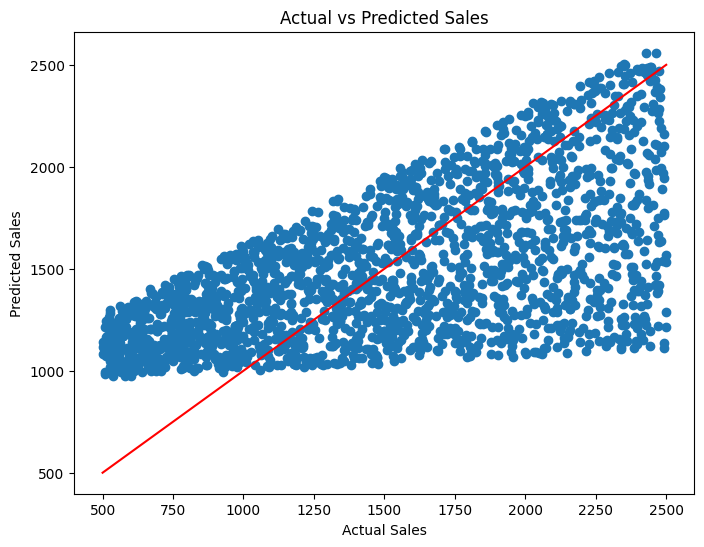

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

Step 9: Advanced Modelling

Objective: To improve predictions

1.Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}")


Random Forest - MSE: 213196.07, R²: 0.35


2.Xboost Regressor

In [32]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluate
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}")


XGBoost - MSE: 216991.03, R²: 0.34


3.Feature Engineering

In [33]:
# Interaction between Discount and Profit
data['Discount_Profit_Interaction'] = data['Discount'] * data['Profit']

# Ratio features
data['Profit_to_Sales'] = data['Profit'] / (data['Sales'] + 1e-5)


In [34]:
# Average sales by city — use if city names are encoded
avg_city_sales = data.groupby('City')['Sales'].mean().to_dict()
data['Avg_City_Sales'] = data['City'].map(avg_city_sales)

# Average profit by category
avg_cat_profit = data.groupby('Category')['Profit'].mean().to_dict()
data['Avg_Cat_Profit'] = data['Category'].map(avg_cat_profit)


In [35]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Category', 'Sub Category', 'City', 'Region', 'State']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


In [36]:
X = data.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
y = data['Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Step 1: Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])

# Step 2: Define the parameter grid
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5]
}

# Step 3: GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Step 4: Best model
best_rf = grid_search.best_estimator_  # <== THIS is what we need


In [42]:
rf_model = best_rf.named_steps['model']


C:\Users\akhil\AppData\Local\Temp\ipykernel_4004\3891756104.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


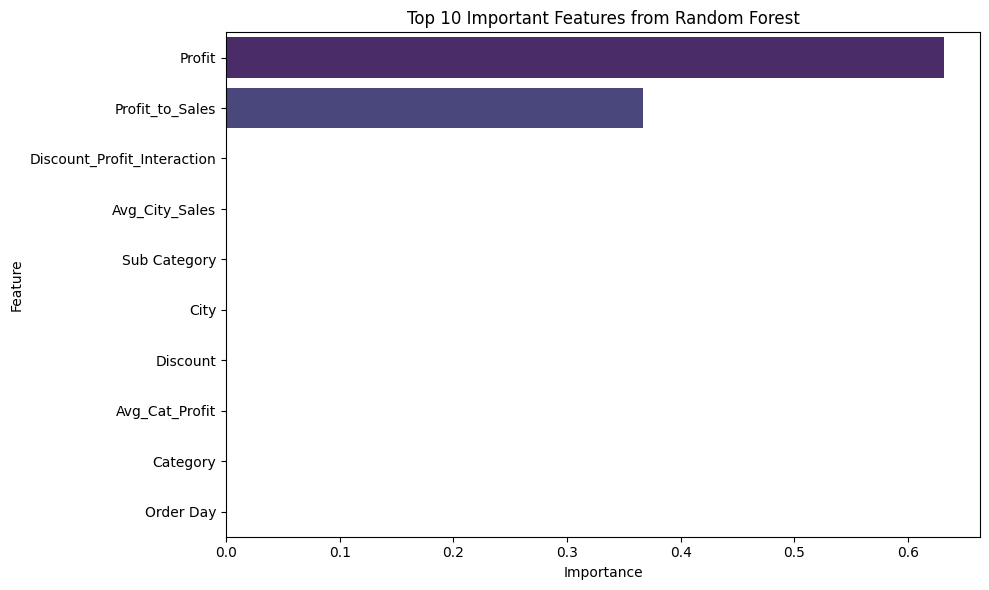

In [45]:
importances = rf_model.feature_importances_
feature_names = X_train.columns  # Make sure X_train is a DataFrame

# Feature importance DataFrame
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
top_n = 10  # or top_n = feature_df[feature_df['Importance'] > 0.01]
top_features = feature_df.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {top_n} Important Features from Random Forest')
plt.tight_layout()
plt.show()

